# shap特征值评估

In [1]:
import shap
shap.initjs() # notebook环境下，加载用于可视化的JS代码

In [4]:
import xgboost
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate":0.01}, xgboost.DMatrix(X, label=y),100)

## 创建explainer
SHAP支持很多类型的explainer(例如deep, gradient, kernel, linear, tree, sampling)

In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

# Local Interper
Local可解释性提供了预测的细节，侧重于解释单个预测是如何生成的。它可以帮助决策者信任模型，并且解释各个特征是如何影响模型单次的决策。

## 单个prediction的解释

In [6]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

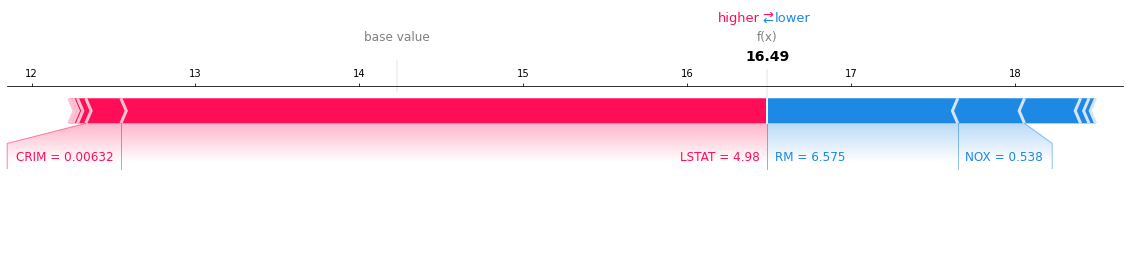

In [7]:
#如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib=True)

将模型的预测结果从基本值(base value)推动到最终的取值(model output)；将预测推高的特征用红色表示，将预测推低的特征用蓝色表示

## 多个预测的解释
如果对多个样本进行解释，将上述形式旋转90度然后水平并排放置，我们可以看到整个数据集的explanations ：

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

# Global Interper
Global可解释性：寻求理解模型的overall structure(总体结构)。这往往比解释单个预测困难得多，因为它涉及到对模型的一般工作原理作出说明，而不仅仅是一个预测。

## summary_plot
summary plot 为每个样本绘制其每个特征的SHAP值，这可以更好地理解整体模式，并允许发现预测异常值。每一行代表一个特征，横坐标为SHAP值。一个点代表一个样本，颜色表示特征值(红色高，蓝色低)。比如，这张图表明LSTAT特征较高的取值会降低预测的房价

下图中每一行代表一个特征，横坐标为SHAP值。一个点代表一个样本，颜色越红说明特征本身数值越大，颜色越蓝说明特征本身数值越小

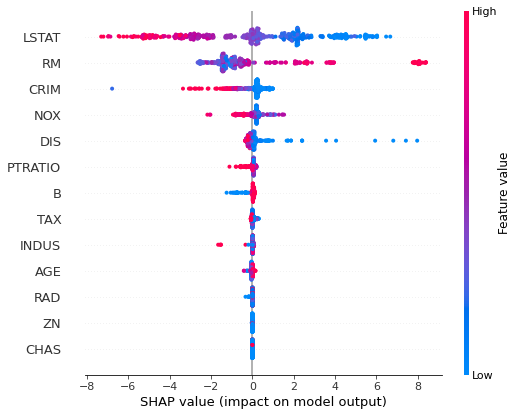

In [30]:
shap.summary_plot(shap_values, X)

## Feature Importance：
之前提到传统的importance的计算方法效果不好，SHAP提供了另一种计算特征重要性的思路。

取每个特征的SHAP值的绝对值的平均值作为该特征的重要性，得到一个标准的条形图(multi-class则生成堆叠的条形图)

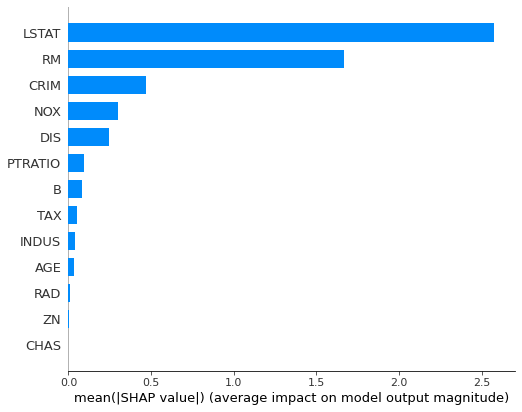

In [31]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Interaction Values
interaction value是将SHAP值推广到更高阶交互的一种方法。树模型实现了快速、精确的两两交互计算，这将为每个预测返回一个矩阵，其中主要影响在对角线上，交互影响在对角线外。这些数值往往揭示了有趣的隐藏关系(交互作用)

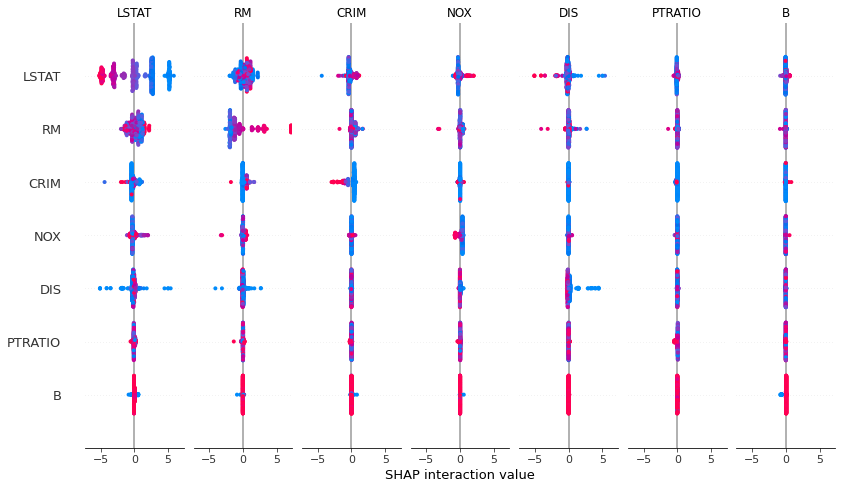

In [32]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

## dependence_plot
为了理解单个feature如何影响模型的输出，我们可以将该feature的SHAP值与数据集中所有样本的feature值进行比较。由于SHAP值表示一个feature对模型输出中的变动量的贡献，下面的图表示随着特征RM变化的预测房价(output)的变化。单一RM(特征)值垂直方向上的色散表示与其他特征的相互作用，为了帮助揭示这些交互作用，“dependence_plot函数”自动选择另一个用于着色的feature。在这个案例中，RAD特征着色强调了RM(每栋房屋的平均房间数)对RAD值较高地区的房价影响较小。

部分依赖图Partial Dependence Plot
SHAP也提供了部分依赖图的功能，与传统的部分依赖图不同的是，这里纵坐标不是目标变量y的数值而是SHAP值。

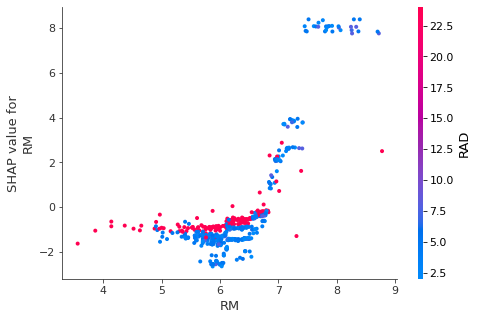

In [33]:
shap.dependence_plot("RM", shap_values, X)